In [122]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt

In [123]:
#Update the Database with relative paths
current_dir = os.getcwd()
AriQualityData= pd.read_csv(os.path.join(current_dir, 'AirQuality.csv'))
IndiaStates = gpd.read_file(os.path.join(current_dir,'IndiaSHP', 'IND_adm1.shp'))

In [124]:
AriQualityData

,Country,State,city,place,lastupdate,Avg,Max,Min,Pollutants
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,70.0,108.0,42.0,PM2.5
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,76.0,102.0,43.0,PM10
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,73.0,118.0,46.0,NO2
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,5.0,6.0,4.0,NH3
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,41.0,109.0,2.0,SO2
...,...,...,...,...,...,...,...,...,...
819,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",21-12-2018 03:00:00,49.0,83.0,14.0,NO2
820,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",21-12-2018 03:00:00,8.0,13.0,2.0,NH3
821,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",21-12-2018 03:00:00,5.0,8.0,2.0,SO2
822,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",21-12-2018 03:00:00,33.0,67.0,14.0,CO


In [125]:
#Get the SO2 pollutant data
SO2Data = AriQualityData[AriQualityData['Pollutants'] == 'SO2']
SO2Data

,Country,State,city,place,lastupdate,Avg,Max,Min,Pollutants
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,41.0,109.0,2.0,SO2
11,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",21-12-2018 03:00:00,NaN,NaN,NaN,SO2
18,India,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",21-12-2018 03:00:00,10.0,12.0,6.0,SO2
25,India,Andhra_Pradesh,Vijayawada,"PWD Grounds, Vijayawada - APPCB",21-12-2018 03:00:00,14.0,23.0,11.0,SO2
31,India,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",21-12-2018 03:00:00,6.0,13.0,2.0,SO2
...,...,...,...,...,...,...,...,...,...
793,India,West_Bengal,Howrah,"Ghusuri, Howrah - WBPCB",21-12-2018 03:00:00,60.0,132.0,16.0,SO2
800,India,West_Bengal,Howrah,"Padmapukur, Howrah - WBPCB",21-12-2018 03:00:00,9.0,22.0,2.0,SO2
807,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",21-12-2018 03:00:00,16.0,34.0,6.0,SO2
814,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",21-12-2018 03:00:00,13.0,30.0,3.0,SO2


In [126]:
#remove the 'place' column
SO2Data = SO2Data.drop(columns=['place','lastupdate','Country','Pollutants','city'])
SO2Data

,State,Avg,Max,Min
4,Andhra_Pradesh,41.0,109.0,2.0
11,Andhra_Pradesh,NaN,NaN,NaN
18,Andhra_Pradesh,10.0,12.0,6.0
25,Andhra_Pradesh,14.0,23.0,11.0
31,Andhra_Pradesh,6.0,13.0,2.0
...,...,...,...,...
793,West_Bengal,60.0,132.0,16.0
800,West_Bengal,9.0,22.0,2.0
807,West_Bengal,16.0,34.0,6.0
814,West_Bengal,13.0,30.0,3.0


In [127]:
#Get the mean of the SO2 pollutant data for each city
SO2Data = SO2Data.groupby(['State']).mean()
SO2Data

,Avg,Max,Min
State,,,
Andhra_Pradesh,17.750000,39.250000,5.250000
Bihar,24.666667,57.000000,12.000000
Delhi,20.000000,34.464286,10.392857
Gujarat,84.000000,122.000000,38.000000
Haryana,11.600000,20.600000,5.400000
Jharkhand,61.000000,125.000000,5.000000
Karnataka,7.100000,15.900000,3.700000
Kerala,32.000000,61.000000,6.000000
Madhya Pradesh,28.666667,57.333333,17.833333


In [128]:
#Replace Andhra_Pradesh with Andhra Pradesh, TamilNadu with Tamil Nadu, Uttar_Pradesh with Uttar Pradesh, and West_Bengal with West Bengal
SO2Data = SO2Data.rename(index={'Andhra_Pradesh':'Andhra Pradesh','TamilNadu':'Tamil Nadu','Uttar_Pradesh':'Uttar Pradesh','West_Bengal':'West Bengal'})
SO2Data

,Avg,Max,Min
State,,,
Andhra Pradesh,17.750000,39.250000,5.250000
Bihar,24.666667,57.000000,12.000000
Delhi,20.000000,34.464286,10.392857
Gujarat,84.000000,122.000000,38.000000
Haryana,11.600000,20.600000,5.400000
Jharkhand,61.000000,125.000000,5.000000
Karnataka,7.100000,15.900000,3.700000
Kerala,32.000000,61.000000,6.000000
Madhya Pradesh,28.666667,57.333333,17.833333


In [129]:
#Download the shapefile of India
IndiaStates = gpd.read_file(os.path.join(current_dir,'IndiaSHP', 'IND_adm1.shp'))

#Rename the column 'NAME_1' to 'city'
IndiaStates = IndiaStates.rename(columns={'NAME_1':'State'})
IndiaStates

,ID_0,ISO,NAME_0,ID_1,State,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,105,IND,India,1,Andaman and Nicobar,Union Territor,Union Territory,NaN,Andaman & Nicobar Islands|Andaman et Nicobar|I...,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,State,State,NaN,NaN,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,State,State,NaN,Agence de la Frontière du Nord-Est(French-obso...,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,State,State,NaN,NaN,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,State,State,NaN,NaN,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."
5,105,IND,India,6,Chandigarh,Union Territor,Union Territory,NaN,NaN,"POLYGON ((76.80293 30.67548, 76.79437 30.66932..."
6,105,IND,India,7,Chhattisgarh,State,State,NaN,NaN,"POLYGON ((83.32760 24.09965, 83.34575 24.09707..."
7,105,IND,India,8,Dadra and Nagar Haveli,Union Territor,Union Territory,NaN,DAdra et Nagar Haveli|Dadra e Nagar Haveli,"POLYGON ((73.02468 20.09630, 73.01955 20.10502..."
8,105,IND,India,9,Daman and Diu,Union Territor,Union Territory,NaN,NaN,"MULTIPOLYGON (((72.86014 20.47096, 72.86340 20..."
9,105,IND,India,10,Delhi,Union Territor,Union Territory,NaN,NaN,"POLYGON ((77.32713 28.68516, 77.32539 28.68250..."


In [130]:
#Get State and geometry columns
IndiaStates = IndiaStates[['State','geometry']]
IndiaStates

,State,geometry
0,Andaman and Nicobar,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,Andhra Pradesh,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,Arunachal Pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,Assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,Bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."
5,Chandigarh,"POLYGON ((76.80293 30.67548, 76.79437 30.66932..."
6,Chhattisgarh,"POLYGON ((83.32760 24.09965, 83.34575 24.09707..."
7,Dadra and Nagar Haveli,"POLYGON ((73.02468 20.09630, 73.01955 20.10502..."
8,Daman and Diu,"MULTIPOLYGON (((72.86014 20.47096, 72.86340 20..."
9,Delhi,"POLYGON ((77.32713 28.68516, 77.32539 28.68250..."


In [131]:
#Join the SO2Data and IndiaStates dataframes
IndiaStates = IndiaStates.join(SO2Data, on='State')

#Replace the NaN values with 0
IndiaStates = IndiaStates.fillna(0)

#Remove Andaaman and Nicobar
IndiaStates = IndiaStates[IndiaStates['State'] != 'Andaman and Nicobar']

SO2Data = IndiaStates

SO2Data

,State,geometry,Avg,Max,Min
1,Andhra Pradesh,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...",17.750000,39.250000,5.250000
2,Arunachal Pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",0.000000,0.000000,0.000000
3,Assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",0.000000,0.000000,0.000000
4,Bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",24.666667,57.000000,12.000000
5,Chandigarh,"POLYGON ((76.80293 30.67548, 76.79437 30.66932...",0.000000,0.000000,0.000000
6,Chhattisgarh,"POLYGON ((83.32760 24.09965, 83.34575 24.09707...",0.000000,0.000000,0.000000
7,Dadra and Nagar Haveli,"POLYGON ((73.02468 20.09630, 73.01955 20.10502...",0.000000,0.000000,0.000000
8,Daman and Diu,"MULTIPOLYGON (((72.86014 20.47096, 72.86340 20...",0.000000,0.000000,0.000000
9,Delhi,"POLYGON ((77.32713 28.68516, 77.32539 28.68250...",20.000000,34.464286,10.392857
10,Goa,"MULTIPOLYGON (((73.78181 15.35569, 73.78181 15...",0.000000,0.000000,0.000000


C:\Users\Rameez\AppData\Local\Temp\ipykernel_9816\3997465553.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(SO2Data.geometry.centroid.x, SO2Data.geometry.centroid.y, SO2Data['State']):


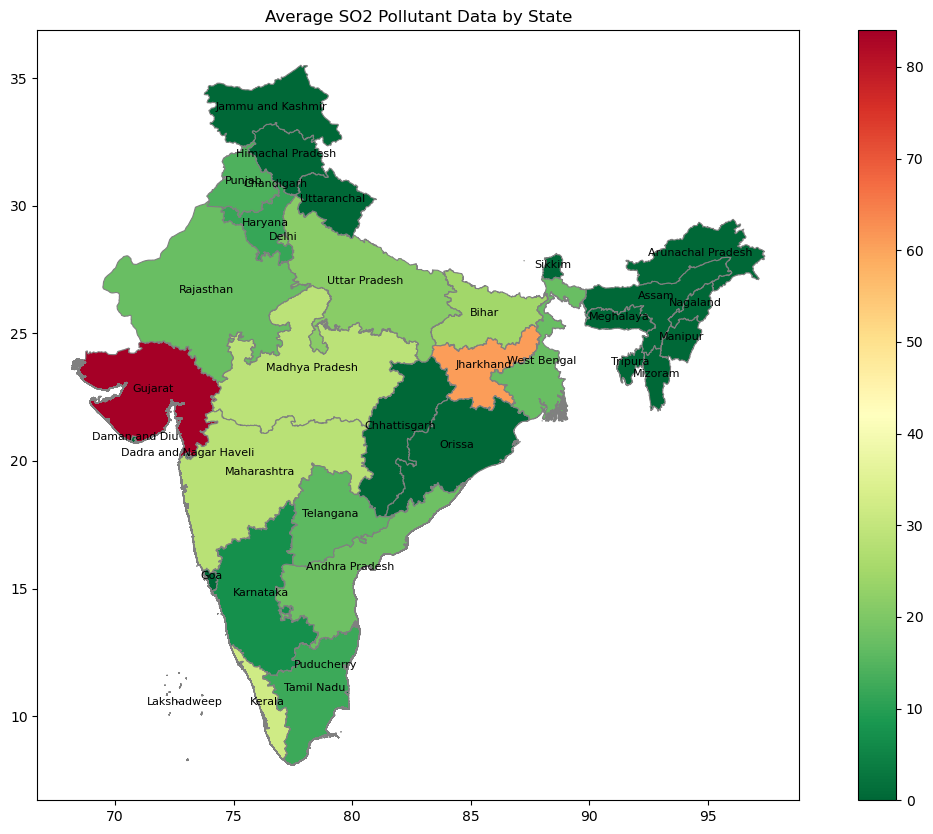

In [132]:
#Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

#Use red for the highest Avg SO2 and green for the lowest Avg SO2
SO2Data.plot(column='Avg', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='grey', legend=True)

#Add state names as labels
for x, y, label in zip(SO2Data.geometry.centroid.x, SO2Data.geometry.centroid.y, SO2Data['State']):
    ax.text(x, y, label, fontsize=8, ha='center')

#Add title and legend
plt.title('Average SO2 Pollutant Data by State')
plt.show()